In [1]:
import os
from matplotlib import rc
from matplotlib import font_manager

rc('font', family='Heiti TC')
os.chdir('/Users/villager/Moo/notebook/data')


In [2]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0].parents[0] / "lib")
# in standard python
# module_path = str(Path.cwd(__file__).parents[0].parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

from lib import candle, movingAverage


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1370831939.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiex201304.Date=[date2num(datetime.strptime(date,"%Y-%m-%d"))\
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1370831939.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=[taiex201304.Date[i],\
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1370831939.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

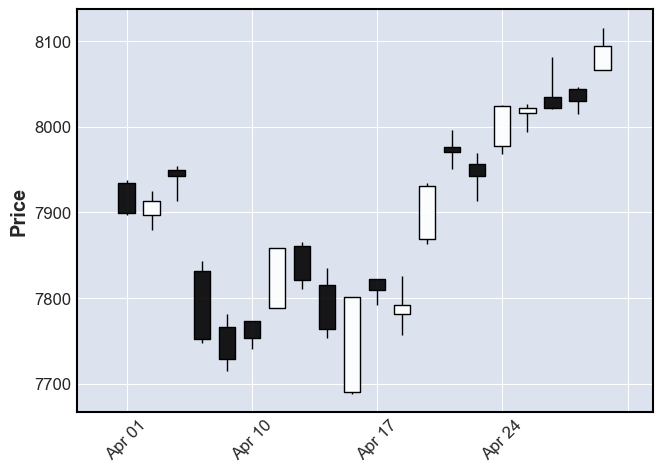

"\nax= plt.subplot()\nmondays = WeekdayLocator(MONDAY)\nax.xaxis.set_major_locator(mondays)\nax.xaxis.set_minor_locator(DayLocator() )\nweekFormatter = DateFormatter('%y %b %d')\nax.xaxis.set_major_formatter(weekFormatter)\nplt.rcParams['font.sans-serif'] = ['Heiti TC']\nplt.rcParams['axes.unicode_minus'] = False\nax.set_title('加權股價指數2013年4月份K線圖')\ncandlestick_ohlc(ax, taiex201304_listData, \n    width=0.7,colorup='r', colordown='g');\nplt.setp(plt.gca().get_xticklabels(),\n    rotation=50,\n    horizontalalignment='center')\nplt.show()\n"

In [3]:
# ch28
import pandas as pd
from matplotlib.dates import date2num
from datetime import datetime

taiex2013=pd.read_csv('taiex2013.csv',sep='\t')
taiex2013.head(n=3)

taiex2013.index = pd.to_datetime(taiex2013.Date)
type(taiex2013.index)
taiex201304 = taiex2013['2013-04-01':'2013-04-30'] 

taiex201304.Date=[date2num(datetime.strptime(date,"%Y-%m-%d"))\
               for date in taiex201304.Date]
            
taiex201304.head()
type(taiex201304)

taiex201304_listData=[]
for i in range(len(taiex201304)):
    a=[taiex201304.Date[i],\
    taiex201304.Open[i],taiex201304.High[i],\
    taiex201304.Low[i],taiex201304.Close[i]]
    taiex201304_listData.append(a)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance import plot as candlestick_ohlc
# will consider use finplot https://pypi.org/project/finplot/

candlestick_ohlc(taiex201304, type='candle')

'''
ax= plt.subplot()
mondays = WeekdayLocator(MONDAY)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(DayLocator() )
weekFormatter = DateFormatter('%y %b %d')
ax.xaxis.set_major_formatter(weekFormatter)
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False
ax.set_title('加權股價指數2013年4月份K線圖')
candlestick_ohlc(ax, taiex201304_listData, 
    width=0.7,colorup='r', colordown='g');
plt.setp(plt.gca().get_xticklabels(),
    rotation=50,
    horizontalalignment='center')
plt.show()
'''


2011-04-20 00:00:00


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3036227441.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all([ClOp[i-2]<-20,abs(ClOp[i-1])< 20,\
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3036227441.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ClOp[i]>5,abs(ClOp[i])>abs(ClOp[i-2]*0.5)]):
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3036227441.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

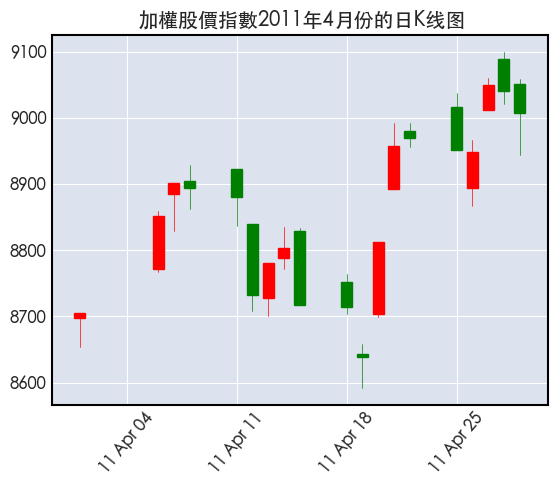

In [4]:
#morning star
taiex2011=pd.read_csv('taiex2011.csv',sep='\t')
taiex2011.index=pd.to_datetime(taiex2011.Date,
    format='%Y-%m-%d')

taiex2011.head(2)
taiex2011.iloc[-2:,:]

Close=taiex2011.Close
Open=taiex2011.Open
ClOp=Close-Open
ClOp.head()
ClOp.describe()

Shape = [0,0,0]
for i in range(3,len(ClOp)):
    if all([ClOp[i-2]<-20,abs(ClOp[i-1])< 20,\
    ClOp[i]>5,abs(ClOp[i])>abs(ClOp[i-2]*0.5)]):
        Shape.append(1)
    else:
        Shape.append(0)

Shape.index(1)


Doji=[0,0,0]
for i in range(3,len(Open)):
    if all([Open[i-1]<Open[i],Open[i-1]<Close[i-2],\
    Close[i-1]<Open[i],(Close[i-1]<Close[i-2])]):
        Doji.append(1)
    else:
        Doji.append(0)

Doji.count(1)


Trend=[0,0,0]
for i in range(3,len(Close)):
    if Close[i-2] < Close[i-3]:
        Trend.append(1)
    else:
        Trend.append(0)

StarSig=[]
for i in range(len(Trend)):
    if all([Shape[i]==1,Doji[i]==1,Trend[i]==1]):
        StarSig.append(1)
    else:
        StarSig.append(0)

for i in range(len(StarSig)):
    if StarSig[i]==1:
        print(taiex2011.index[i])


taiex201104=taiex2011['2011-04':'2011-04']

# Errata: There is an error in the book.
# the right one is as follows:
candle.candlePlot(taiex201104 ,
    title=' 加權股價指數2011年4月份的日K线图')


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2706016497.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all([Close13[i]<Open13[i],\
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2706016497.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Close13[i-1]>Open13[i-1],\
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2706016497.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

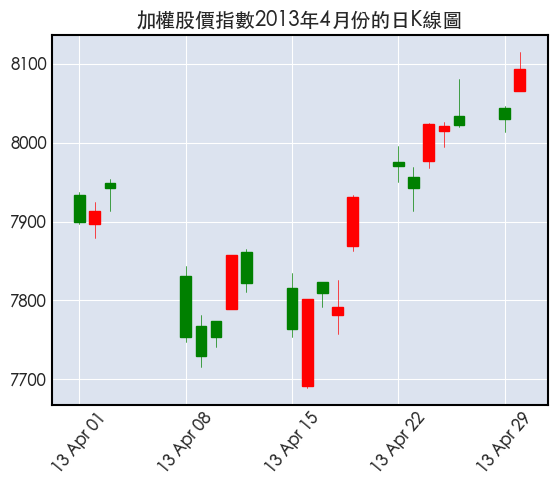

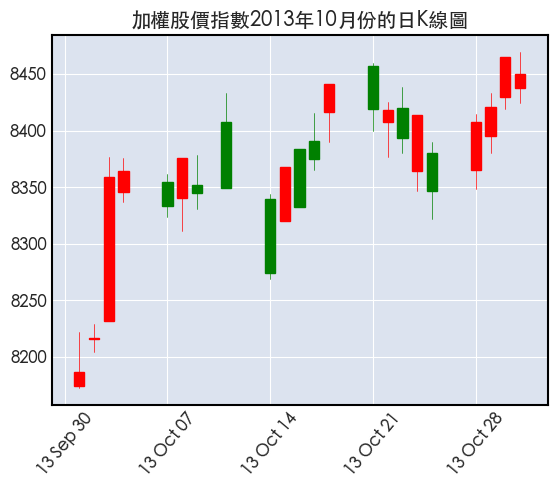

In [5]:
# Dark Cloud Cover
import pandas as pd
taiex2013=pd.read_csv('taiex2013.csv',sep ='\t')

taiex2013.index=pd.to_datetime(taiex2013.Date,
    format='%Y-%m-%d')


Close13=taiex2013.Close
Open13=taiex2013.Open


Cloud=pd.Series(0,index=Close13.index)
for i in range(1,len(Close13)):
    if all([Close13[i]<Open13[i],\
            Close13[i-1]>Open13[i-1],\
            Open13[i]>Close13[i-1],\
            Close13[i]<0.5*(Close13[i-1]+Open13[i-1]),\
            Close13[i]>Open13[i-1]]):
        Cloud[i]=1


Trend=pd.Series(0,index=Close13.index)
for i in range(2,len(Close13)):
    if Close13[i-1]>Close13[i-2]>Close13[i-3]:
        Trend[i]=1

darkCloud=Cloud+Trend
darkCloud[darkCloud==2]


taiex201304=taiex2013['2013-04':'2013-04']           
candle.candlePlot(taiex201304 ,\
                  title='加權股價指數2013年4月份的日K線圖')


taiex201310=taiex2013['2013-10':'2013-10']
candle.candlePlot(taiex201310,\
                  title='加權股價指數2013年10月份的日K線圖')


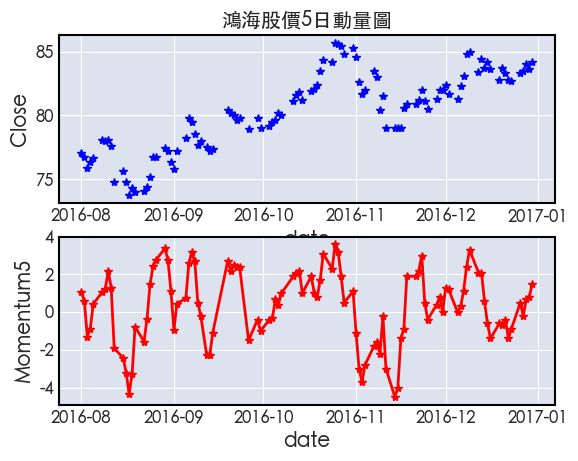

In [6]:
# ch29
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

Foxconn=pd.read_csv('2317.csv',sep='\t')
Foxconn.index=pd.to_datetime(Foxconn.Date,
              format='%Y-%m-%d')
Foxconn.head(2)

Close=Foxconn.Close
Close.describe()

lag5Close=Close.shift(5)

momentum5=Close-lag5Close
momentum5.tail()


#plot
plt.subplot(211)
plt.plot(Close['2016-08-01':'2016-12-31'],'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('鴻海股價5日動量圖')

plt.subplot(212)
plt.plot(momentum5['2016-08-01':'2016-12-31'],'r-*')
plt.xlabel('date')
plt.ylabel('Momentum5')
plt.show()

#divide
Momen5=Close/lag5Close-1
Momen5=Momen5.dropna();
Momen5[:5]


#momentum function
def momentum(price,periond):
    lagPrice=price.shift(periond)
    momen=price-lagPrice
    momen= momen.dropna()
    return(momen)

momentum(Close,5).tail(n=5)


momen35=momentum(Close,35)


/Users/villager/Moo/lib/candle.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = [candleData.Date[i],\
/Users/villager/Moo/lib/candle.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  candleData.Open[i],candleData.High[i],\
/Users/villager/Moo/lib/candle.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  candleData.Low[i],candleData.Close[i]]


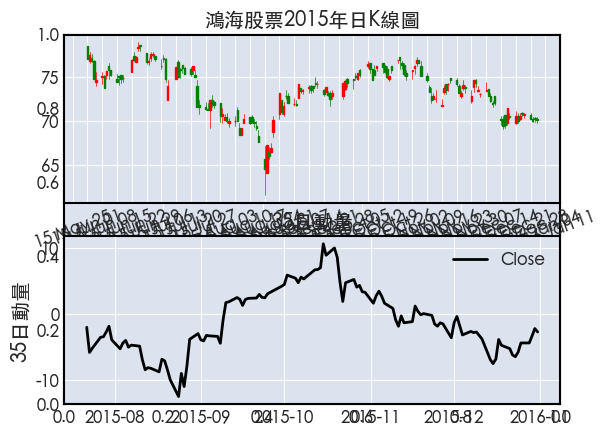

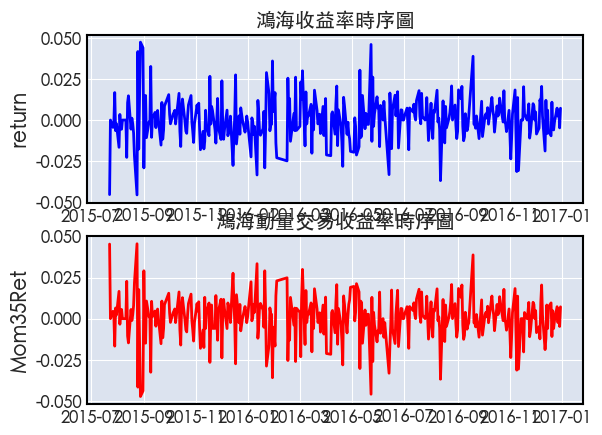

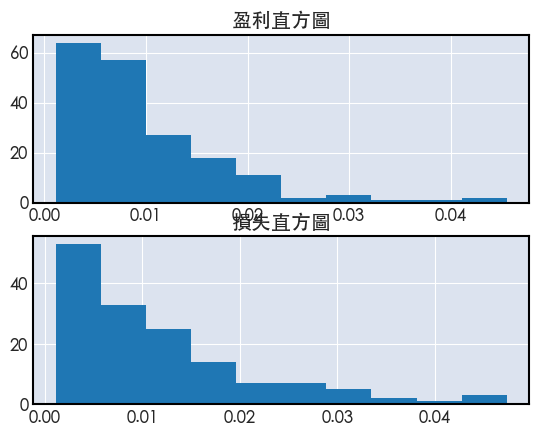

,win,loss
count,186.000000,150.000000
mean,0.009804,0.011285
std,0.007847,0.010117
min,0.001111,0.001146
25%,0.003886,0.003754
50%,0.008264,0.007807
75%,0.012961,0.015208
max,0.045522,0.047349


In [7]:
#candle 模組是本書編的模組，裡面有繪製K線函數candleLinePlots
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

Foxconn15=Foxconn['2015':'2015']
candle.candleLinePlots(Foxconn15,\
               candleTitle='鴻海股票2015年日K線圖',\
               splitFigures=True,Data=momen35['2015'],\
               title='35日動量',ylabel='35日動量')



Close=Foxconn.Close
momen35=momentum(Close,35)
momen35.head()

# 當35日動量值為負值時 signal取值為-1 表示賣出
# 當35日動量值為非負值時 signal取值為1 表示買入
signal=[1 if momen35Value>0 else -1 for momen35Value in momen35]
signal=pd.Series(signal,index=momen35.index)
signal.head()

# 根據買賣點買入和賣出 計算收益率
tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
Mom35Ret=(ret*(signal.shift(1))).dropna()
Mom35Ret[:5]
# 計算指標交易獲勝率
win=Mom35Ret[Mom35Ret>0]
winrate=len(win)/len(Mom35Ret)
winrate

# 繪製收益時序圖
plt.subplot(2,1,1)
plt.plot(ret[Mom35Ret.index],'b')
plt.ylabel('return')
plt.title('鴻海收益率時序圖')

plt.subplot(2,1,2)
plt.plot(Mom35Ret,'r')
plt.ylabel('Mom35Ret')
plt.title('鴻海動量交易收益率時序圖')
plt.show()

# 提取35日指標預測正確時的收益率與預測失敗時收益率 進行比較分析
loss=-Mom35Ret[Mom35Ret<0]

plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方圖")
plt.subplot(2,1,2)
loss.hist()
plt.title("損失直方圖")
plt.show()
# 計算兩種收益率的平均值與分位數值
performance=pd.DataFrame({"win":win.describe(),\
"loss":loss.describe()})
# 儘管預測準確率>0.5 損失收益率>成功收益率 預設準確時的收益率更集中
performance


In [8]:
# ch30
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 獲取統一股票交易數據
uni_President=pd.read_csv('1216.csv')
uni_President.index=pd.to_datetime(uni_President.Date)
uni_President.head()


Close=uni_President.Close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
closeDif.head()

# upPrc表示價格上漲
# downPrc表示價格下跌
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc).astype('object')
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc).astype('object')
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
rsidata.head()
# 用簡單平均數計算上漲力度SMUP 下跌力度SMDOWN
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))
# 計算RSI
rsi6=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(len(SMUP))]

indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()


count    242.000000
mean      49.975626
std       24.669806
min        0.000000
25%       34.329870
50%       51.803325
75%       68.465546
max      100.000000
dtype: float64

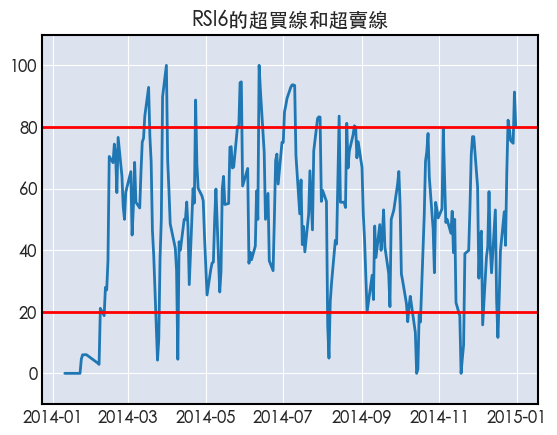

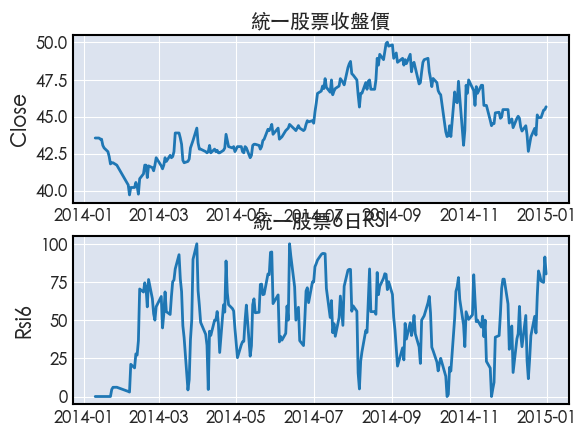

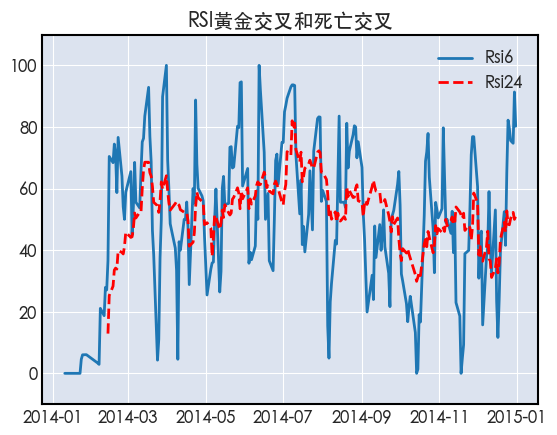

In [9]:
# RSI function
def rsi(price,period=6):
    import pandas as pd
    closeDif=(price-price.shift(1)).dropna()
    upPrc=pd.Series(0,index=closeDif.index).astype('object')
    upPrc[closeDif>0]=closeDif[closeDif>0]
    downPrc=pd.Series(0,index=closeDif.index).astype('object')
    downPrc[closeDif<0]=-closeDif[closeDif<0]
    rsi=[]
    for i in range(period,len(upPrc)+1):
        up_mean = np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32)
        up_down = np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32)
        rsi.append(100*up_mean/(up_mean+up_down))
    rsi=pd.Series(rsi,index=closeDif.index[(period-1):])
    return(rsi)

# 計算統一股價的12日的RSI值
Rsi12=rsi(Close,12)
Rsi12.tail()
# 計算統一股價的24日的RSI值
Rsi24=rsi(Close,24)
Rsi24.tail()


plt.plot(Rsi6)
plt.title('RSI6的超買線和超賣線')
plt.ylim(-10,110)
plt.axhline(y=80,color='red')
plt.axhline(y=20,color='red')
plt.show()


#收盤價和6日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')

plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('統一股票6日RSI')
plt.show()

#黃金交叉和死亡交叉
plt.plot(Rsi6,label='Rsi6')
plt.plot(Rsi24,
         label='Rsi24',color='red',\
         linestyle='dashed')
plt.title('RSI黃金交叉和死亡交叉')
plt.ylim(-10,110)
plt.legend()
plt.show()


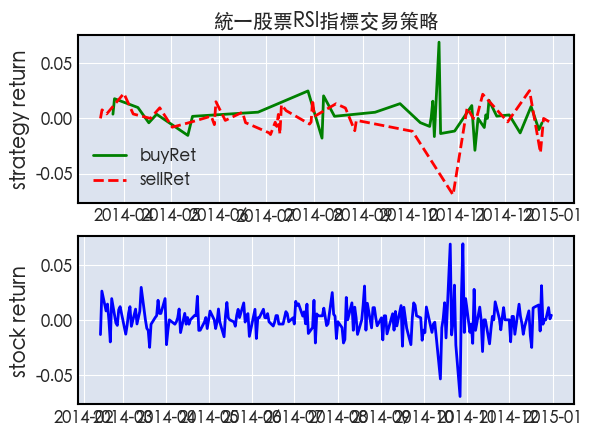

Text(0.5, 1.0, 'RSI指標交易策略累積收益率')

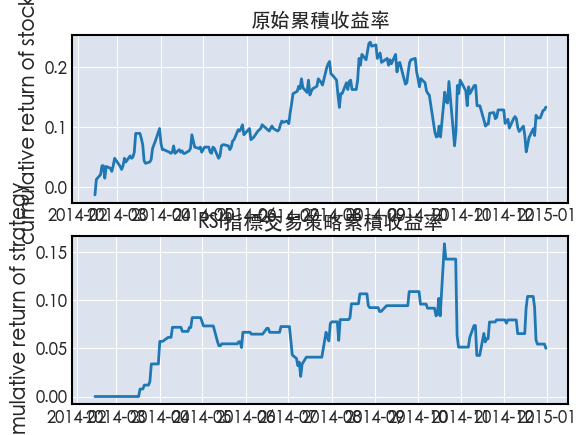

In [10]:
#strategy
uni_President=pd.read_csv('1216.csv')
uni_President.index=pd.to_datetime(uni_President.Date)
Close =uni_President.Close
rsi6=rsi(Close,6)
rsi24=rsi(Close,24)

#rsi6的超買與超賣
Sig1=[]
for i in rsi6:
    if i>80:
        Sig1.append(-1)
    elif i<20:
        Sig1.append(1)
    else:
        Sig1.append(0)

date1=rsi6.index
Signal1=pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)
#交易訊號二 黃金交叉與死亡交叉
Signal2=pd.Series(0,index=rsi24.index)
lagrsi6= rsi6.shift(1)
lagrsi24= rsi24.shift(1)
for i in rsi24.index:
    if (rsi6[i]>rsi24[i]) & (lagrsi6[i]<lagrsi24[i]):
        Signal2[i]=1
    elif (rsi6[i]<rsi24[i]) & (lagrsi6[i]>lagrsi24[i]):
        Signal2[i]=-1
#合併交易訊號
signal=Signal1+Signal2
signal[signal==2] = 1
signal[signal==-2] = -1
signal=signal.dropna()

tradSig=signal.shift(1)
# 求統一股票收益率
ret=Close/Close.shift(1)-1
ret.head()
# 求買入做多交易收益率
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy
# 求賣出做空交易收益率
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell
# 求買賣交易合併的收益率
tradeRet=ret*tradSig
# 繪製三種交易收益率時序圖 展現收益率的分佈狀況
plt.subplot(211)
plt.plot(buyRet,label='buyRet',color='g')
plt.plot(sellRet,label='sellRet',
    color='r',linestyle='dashed')
plt.title('統一股票RSI指標交易策略')
plt.ylabel('strategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()
# 求預測正確的平均收益率與預測失敗時的平均收益率
def strat(tradeSignal,ret):
    ret=ret[tradeSignal.index]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
           tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
             tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)
# 計算買入點 賣出點 和整個交易點的
# 預測獲勝率 平均獲勝收益率 平均損失收益率
BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

# 求累積收益率
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1
# 繪製累積收益率圖
plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumulative return of stock')
plt.title('原始累積收益率')
plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumulative return of strategy')
plt.title('RSI指標交易策略累積收益率')

/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2227874545.py:23: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Sma5[i]=np.mean(Close[(i-4):(i+1)])
/Users/villager/Moo/lib/movingAverage.py:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sma[i]=np.mean(tsPrice[(i-k+1):(i+1)])
/Users/villager/Moo/lib/movingAverage.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  priceList.append(price[i])


126.648

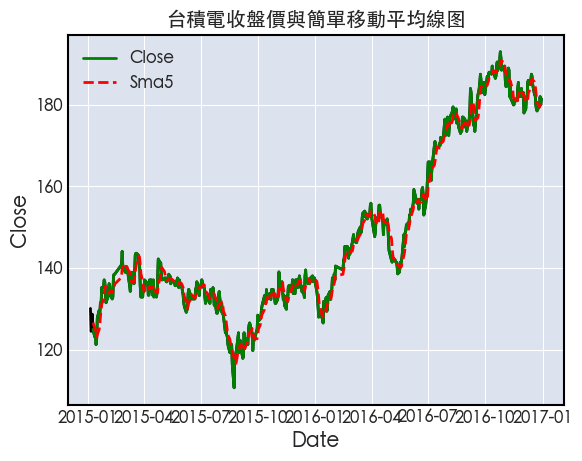

In [11]:
# ch31
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

TSMC=pd.read_csv('2330.csv',sep='\t')
TSMC.index=pd.to_datetime(TSMC.Date)
TSMC.head(n=3)

Close=TSMC.Close
plt.plot(Close,'k')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('台積電股票收盤價時序圖')

#### SMA
Sma5=pd.Series(0.0,index=Close.index)

for i in range(4,len(Close)):
    Sma5[i]=np.mean(Close[(i-4):(i+1)])

Sma5.tail()


plt.plot(Close[4:],label="Close",color='g')
plt.plot(Sma5[4:],label="Sma5",color='r',linestyle='dashed')
plt.title("台積電收盤價與簡單移動平均線图")
plt.legend()

# SMA
sma5=movingAverage.smaCal(Close ,5)    
sma5.head()

sma5_generator = movingAverage.smaCal_gene(Close ,5)
next(sma5_generator)


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3203155487.py:14: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Wma5[i]=np.sum(w*Close[(i-4):(i+1)])
/Users/villager/Moo/lib/movingAverage.py:28: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
/Users/villager/Moo/lib/movingAverage.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  priceList.append(price[i])


126.244

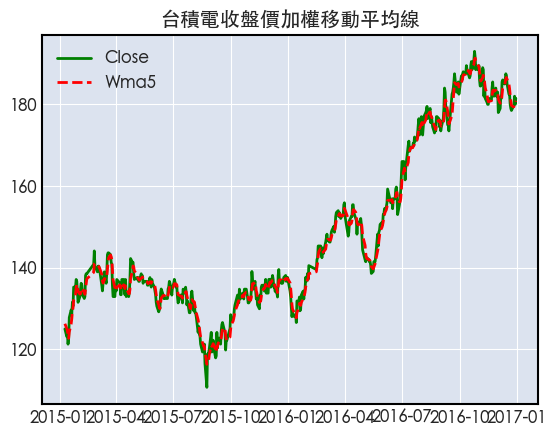

In [12]:
##WMA 
b=np.array([1,2,3,4,5])
w=b/sum(b)
w

m1Close=Close[:5]
wec=w*m1Close
sum(wec)


Wma5=pd.Series([np.nan]*len(Close),index=Close.index)

for i in range(4,len(Close)):
    Wma5[i]=np.sum(w*Close[(i-4):(i+1)])

Wma5[2:7]


plt.plot(Close[4:],label="Close",color='g')
plt.plot(Wma5[4:],label="Wma5",color='r',linestyle='dashed')
plt.title('台積電收盤價加權移動平均線')
plt.legend()

# WMA
wma5=movingAverage.wmaCal(Close,w)   
wma5.head()
   
wma5=movingAverage.wmaCal(Close,[0.1,0.15,0.2,0.25,0.3])
wma5.tail()

wma5_generator=movingAverage.wmaCal_gene(Close,w) 
next(wma5_generator)


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/4256222806.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Ewma5[4]=np.mean(Close[:4])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/4256222806.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ewma5[i]=0.2*Close[i]+(1-0.2)*Ewma5[i-1]
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/4256222806.py:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use

125.9384

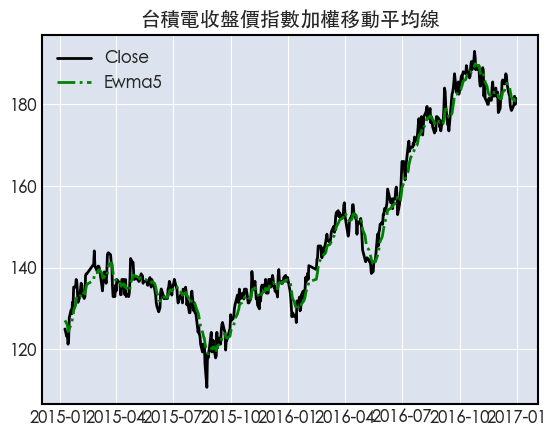

In [13]:
Ewma5=pd.Series([np.nan]*len(Close),index=Close.index)
Ewma5[4]=np.mean(Close[:4])
for i in range(5,len(Close)):
    Ewma5[i]=0.2*Close[i]+(1-0.2)*Ewma5[i-1]

Ewma5.tail()

plt.plot(Close[4:],label="Close",color='k')
plt.plot(Ewma5[4:],label="Ewma5",\
         color='g',linestyle='-.')
plt.title('台積電收盤價指數加權移動平均線')
plt.legend()

# 指數加權移動平均函數

Ewma=movingAverage.ewmaCal(Close,5,0.2)
Ewma.tail()

ewma_generator=movingAverage.ewmaCal_gene(Close,5,0.2)
next(ewma_generator)
next(ewma_generator)



/Users/villager/Moo/lib/movingAverage.py:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sma[i]=np.mean(tsPrice[(i-k+1):(i+1)])
/Users/villager/Moo/lib/movingAverage.py:28: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
/Users/villager/Moo/lib/movingAverage.py:49: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Ewma[period-1]=np.mean(tsprice[:period])
/Users/villager/Moo/lib/

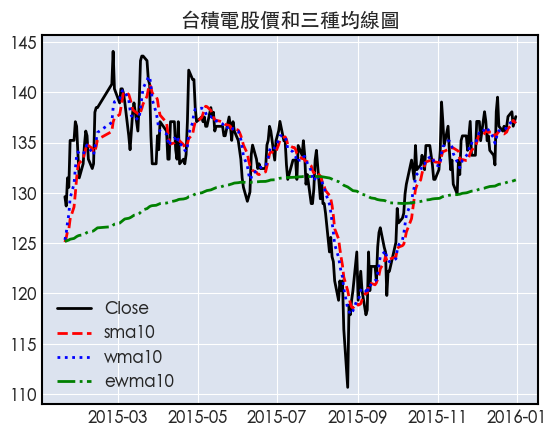

In [14]:
#TSMC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

TSMC=pd.read_csv('2330.csv',sep='\t')
TSMC.index=pd.to_datetime(TSMC.Date)
Close=TSMC.Close
Close.describe()

Close15=Close['2015']

sma10=movingAverage.smaCal(Close15,10)
sma10.tail(n=3)

weight=np.array(range(1,11))/sum(range(1,11))
wma10=movingAverage.wmaCal(Close15,weight)
wma10.tail(n=3)

expo= 2/(len(Close15)+1)
ewma10=movingAverage.ewmaCal(Close15,10,expo)
ewma10.tail(n=3)


plt.plot(Close15[10:],label="Close",color='k')
plt.plot(sma10[10:],label="sma10",color='r',linestyle='dashed')
plt.plot(wma10[10:],label="wma10",color='b',linestyle=':')
plt.plot(ewma10[10:],label="ewma10",color='g',linestyle='-.')
plt.title('台積電股價和三種均線圖')
plt.legend()


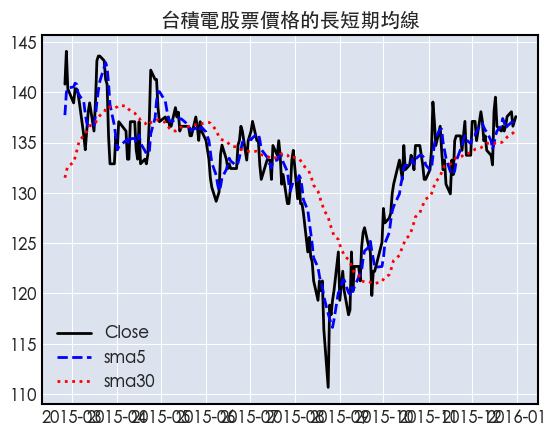

In [15]:
sma5=movingAverage.smaCal(Close15,5)
sma30=movingAverage.smaCal(Close15,30)
plt.plot(Close15[30:],label="Close",color='k')
plt.plot(sma5[30:],label="sma5",color='b',linestyle='dashed')
plt.plot(sma30[30:],label="sma30",color='r',linestyle=':')
plt.title("台積電股票價格的長短期均線")
plt.legend()


/Users/villager/Moo/lib/movingAverage.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  priceList.append(price[i])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3305506589.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if Close[i-1]<sma10_before and Close[i]>sma10_now:
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3305506589.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif Close

0.4266666666666667

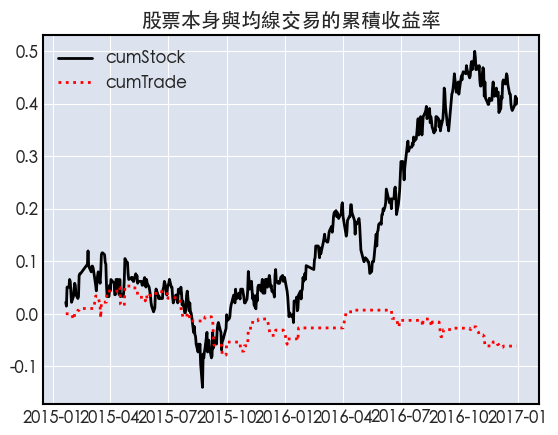

In [16]:
#trading-sma10 and close
# 產生一個10日SMA產生器
sma10_gene=movingAverage.smaCal_gene(Close,10)
sma10_before = next(sma10_gene)
smaSignal=[]
for i in range(11,len(Close)):
    sma10_now = next(sma10_gene)
    # 股價上穿均線 signal 1
    if Close[i-1]<sma10_before and Close[i]>sma10_now:
        smaSignal.append(1)
    # 股價下穿均線 signal -1
    elif Close[i-1]>sma10_before and Close[i]<sma10_now:
        smaSignal.append(-1)
    else:
        smaSignal.append(0)
    sma10_before = sma10_now
    

smaSignal=pd.Series(smaSignal,index=Close.index[11:])

smaTrade=smaSignal.shift(1).dropna()
smaBuy=smaTrade[smaTrade==1]
smaBuy.head(n=3)
smaSell=smaTrade[smaTrade==-1]
smaSell.head(n=3)
# 計算單期日收益率
tsmcRet=Close/Close.shift(1)-1
smaRet=(tsmcRet*smaTrade).dropna()
# 累積收益率表現
cumStock=np.cumprod(1+tsmcRet[smaRet.index[0]:])-1
cumTrade=np.cumprod(1+smaRet)-1
cumdata=pd.DataFrame({'cumTrade':cumTrade,\
                     'cumStock':cumStock})
cumdata.iloc[-6:,:]
# 繪製累積收益率圖
plt.plot(cumStock,label="cumStock",color='k')
plt.plot(cumTrade,label="cumTrade",color='r',linestyle=':')
plt.title('股票本身與均線交易的累積收益率')
plt.legend()
# 求買點預測轉確率
smaRet[smaRet==(-0)]=0
smaWinrate=len(smaRet[smaRet>0])/len(smaRet[smaRet!=0])
smaWinrate


/Users/villager/Moo/lib/movingAverage.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  priceList.append(price[i])


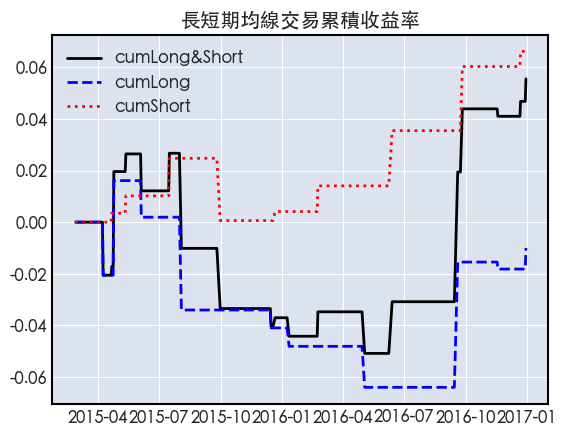

In [17]:
#short  and  long
# 分別產生5日SMA 30日SMA 產生器
sma5_gene=movingAverage.smaCal_gene(Close,5)
sma30_gene=movingAverage.smaCal_gene(Close,30)
sma5_before = next(sma5_gene)
sma30_before = next(sma30_gene)
SLSignal=[]
for i in range(31,len(Close)):
    sma5_now = next(sma5_gene)
    sma30_now = next(sma30_gene)
    if sma5_before<sma30_before and sma5_now>sma30_now:
        SLSignal.append(1)
    elif sma5_before>sma30_before and sma5_now<sma30_now:
        SLSignal.append(-1)
    else:
        SLSignal.append(0)
    sma5_before = sma5_now
    sma30_before = sma30_now

SLSignal = pd.Series(SLSignal,index = Close.index[31:])
SLSignal[SLSignal==1]
SLSignal[SLSignal==-1]

SLTrade=SLSignal.shift(1)
# 計算股價上升的預測準確率
Long=pd.Series(0,index=SLTrade.index)
Long[SLTrade==1]=1
LongRet=(Long*tsmcRet).dropna()
winLrate=len(LongRet[LongRet>0])/len(LongRet[LongRet!= 0] )
winLrate
# 從 winrate 的值 0.3 看出 雙均線交叉對股價上升的預測準確率
# 計算股價下跌的預測準確率
Short= pd.Series(0,index=SLTrade.index)
Short[SLTrade==-1]=-1
ShortRet=(Short*tsmcRet).dropna()
winSrate=len(ShortRet[ShortRet>0])/len(ShortRet[ShortRet!=0])
winSrate
# 雙均線交叉對股價下跌的預測準確率為 0.89
# 計算股價變化趨勢的預測獲勝率
SLtradeRet=(SLTrade*tsmcRet).dropna()
winRate= len(SLtradeRet[SLtradeRet>0])/len(\
         SLtradeRet[SLtradeRet!=0])
winRate

cumLong=np.cumprod(1+LongRet)-1
cumShort=np.cumprod(1+ShortRet)-1
cumSLtrade=np.cumprod(1+SLtradeRet)-1

plt.plot(cumSLtrade,label="cumLong&Short",color='k')
plt.plot(cumLong, label="cumLong",\
         color='b',linestyle='dashed')
plt.plot(cumShort,label="cumShort",\
         color='r',linestyle=':')
plt.title('長短期均線交易累積收益率')
plt.legend(loc='best')


/Users/villager/Moo/lib/movingAverage.py:49: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Ewma[period-1]=np.mean(tsprice[:period])
/Users/villager/Moo/lib/movingAverage.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1]
/Users/villager/Moo/lib/movingAverage.py:51: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1

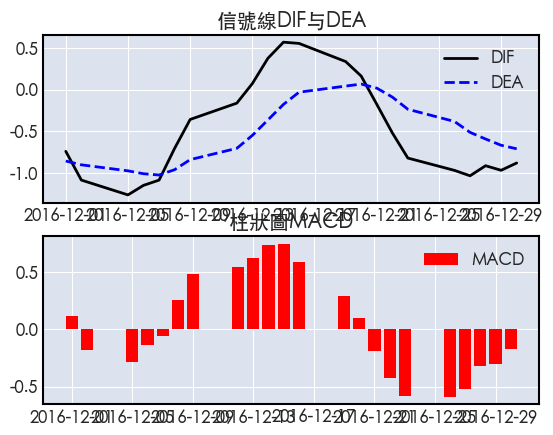

In [18]:
#MACD
DIF=movingAverage.ewmaCal(Close,12,2/(1+12))\
       -movingAverage.ewmaCal(Close,26,2/(1+26))
DIF.tail(n=3)

DEA=movingAverage.ewmaCal(DIF.dropna(),9,2/(1+9))
DEA.tail()

MACD=DIF-DEA
MACD.tail(n=3)

plt.subplot(211)
plt.plot(DIF['2016-12'],\
      label="DIF",color='k')
plt.plot(DEA['2016-12'], label="DEA",\
        color='b',linestyle='dashed')
plt.title('信號線DIF与DEA')
plt.legend()
plt.subplot(212)
plt.bar(x=MACD['2016-12'].index,\
        height=MACD['2016-12'],\
        label='MACD',color='r')
plt.title('柱狀圖MACD')
plt.legend()


/Users/villager/Moo/lib/candle.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = [candleData.Date[i],\
/Users/villager/Moo/lib/candle.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  candleData.Open[i],candleData.High[i],\
/Users/villager/Moo/lib/candle.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  candleData.Low[i],candleData.Close[i]]


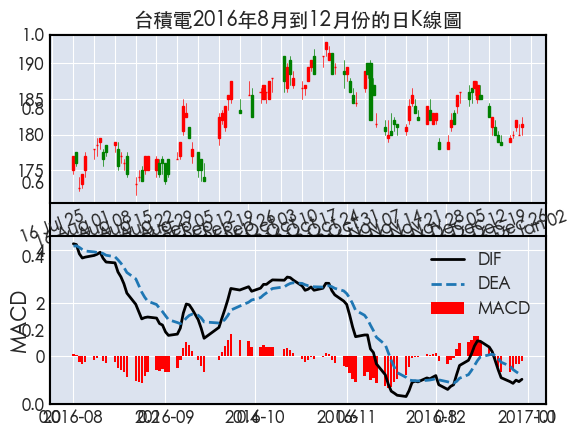

/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/4032800194.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all([DIF[i]>DEA[i]>0.0,DIF[i-1]<DEA[i-1]]):
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/4032800194.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif all([DIF[i]<DEA[i]<0.0,DIF[i-1]>DEA[i-1]]):
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/4032800194.py:16: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set

0.2777777777777778

In [19]:
macddata=pd.DataFrame()
macddata['DIF']= DIF['2016-08':'2016-12']
macddata['DEA']= DEA['2016-08':'2016-12']
macddata['MACD']= MACD['2016-08':'2016-12']

candle.candleLinePlots(TSMC['2016-08':'2016-12'],\
              candleTitle='台積電2016年8月到12月份的日K線圖',\
              splitFigures=True,Data=macddata,\
              ylabel='MACD')

DEA=DEA.dropna()
DIF=DIF[DEA.index]
macdSignal=pd.Series(0,index=DIF.index)
for i in range(1,len(DIF)):
    if all([DIF[i]>DEA[i]>0.0,DIF[i-1]<DEA[i-1]]):
        macdSignal[i]=1
    elif all([DIF[i]<DEA[i]<0.0,DIF[i-1]>DEA[i-1]]):
        macdSignal[i]=-1
macdSignal.tail()

macdTrade=macdSignal.shift(1)
macdRet=(tsmcRet*macdTrade).dropna()
macdRet[macdRet==-0]=0
macdWinRate=len(macdRet[macdRet>0])/len(macdRet[macdRet!=0])
macdWinRate



/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1118088028.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash[entry]=cash[entry-1]
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1118088028.py:27: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  cash[entry]=cash[entry-1]
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1118088028.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

0.14148

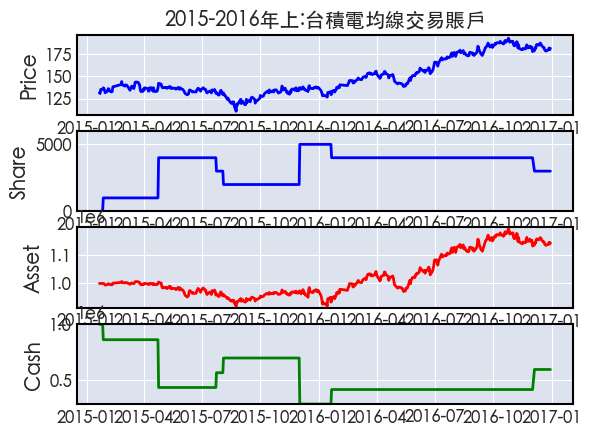

In [20]:
# 合併精液訊號
AllSignal=smaSignal+SLSignal+macdSignal

for i in AllSignal.index:
    if AllSignal[i]>1:
        AllSignal[i]=1
    elif AllSignal[i]<-1:
        AllSignal[i]=-1
    else:
        AllSignal[i]=0

AllSignal[AllSignal==1]
AllSignal[AllSignal==-1]

tradSig=AllSignal.shift(1).dropna()

Close=Close[-len(tradSig):]
cash=pd.Series(0.0,index=Close.index)
share=pd.Series(0,index=Close.index)

#當價格連續兩天上升且交易信號沒有顯示賣出時，
#第一次開賬戶持有股票

entry=3
cash[:entry]=1000000
while entry<len(Close):
    cash[entry]=cash[entry-1]
    if all([Close[entry-1]>=Close[entry-2],\
            Close[entry-2]>=Close[entry-3],\
            AllSignal[entry-1]!=-1]):
        share[entry]=1000
        cash[entry]= cash[entry]-1000*Close[entry]
        break
    entry+=1

#根據交易信號交易股票
i=entry+1
while i<len(tradSig):
    cash[i]=cash[i-1]
    share[i]=share[i-1]
    #買入時，買入3000share
    if tradSig[i]==1:
        share[i] = share[i]+3000
        cash[i] = cash[i]-3000*Close[i]
    #賣出時，賣出1000share
    elif tradSig[i]==-1:
        share[i] = share[i]-1000
        cash[i] = cash[i]+1000*Close[i]
    i+=1

asset=cash+share*Close

asset.tail()
# 繪製交易賬戶曲線圖
plt.subplot(411)
plt.title('2015-2016年上:台積電均線交易賬戶')
plt.plot(Close, color='b')
plt.ylabel("Price")
plt.subplot(412)
plt.plot(share, color='b')
plt.ylabel("Share")
plt.ylim(0,max(share)+1000)

plt.subplot(413)
plt.plot(asset,label="asset",color='r')
plt.ylabel("Asset")
plt.ylim(min(asset)-5000,max(asset)+5000)

plt.subplot(414)
plt.plot(cash, label="cash",color='g')
plt.ylabel("Cash")
plt.ylim(min(cash)-500,max(cash)+5000)

TradeReturn=(asset[-1]-1000000)/1000000
TradeReturn


/Users/villager/Moo/lib/candle.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = [candleData.Date[i],\
/Users/villager/Moo/lib/candle.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  candleData.Open[i],candleData.High[i],\
/Users/villager/Moo/lib/candle.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  candleData.Low[i],candleData.Close[i]]


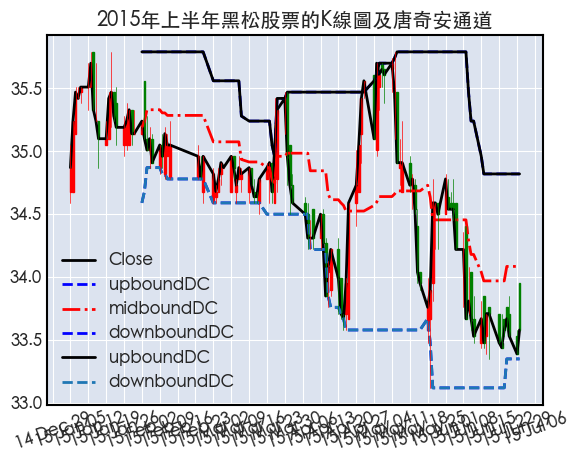

In [21]:
# ch32
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False
# 讀取黑松股票數據
HeySong = pd.read_csv('1234-1.csv',sep='\t')
HeySong.index=pd.to_datetime(HeySong.Date, format='%Y-%m-%d')
# 體曲收盤價 最高 最低價 數據
Close = HeySong.Close
High = HeySong.High
Low = HeySong.Low
# 求唐奇安上 中 下 通道
upboundDC = [max(High[(i-20):i]) for i in range(20,len(Close))]

downboundDC = [min(Low[(i-20):i]) for i in range(20,len(Close))]

boundDC = pd.DataFrame()
boundDC['upboundDC']=upboundDC
boundDC['downboundDC']=downboundDC
boundDC['midboundDC']=0.5*(boundDC['upboundDC']+boundDC['downboundDC'])
boundDC.index = Close.index[20:]

# 繪製2015年上半年黑松價格唐奇安通道上中下軌道線圖
plt.plot(Close[:'2015-06-30'],label="Close",color='k')
plt.plot(boundDC.upboundDC[:'2015-06-30'],
         label="upboundDC",color='b',
         linestyle='dashed')
plt.plot(boundDC.midboundDC[:'2015-06-30'],
         label="midboundDC",color='r',linestyle='-.')
plt.plot(boundDC.downboundDC[:'2015-06-30'],
         label="downboundDC",color='b',
         linestyle='dashed')
plt.title("2015年上半年黑松股價唐奇安通道")
plt.legend()
# 繪製黑松2015年上半年的k線圖及唐奇安通道
candle.candleLinePlots(candleData=HeySong[:'2015-06-30'],
        candleTitle='2015年上半年黑松股票的K線圖及唐奇安通道',
        splitFigures=False,
        Data=boundDC[:'2015-06-30'][['upboundDC','downboundDC']])


In [22]:

def upbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

def downbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]<tsRefLine[i],tsLine[i-1]>tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

#DC Strategy
# 唐奇安突破策略
# 上穿為 1 下穿為 -1 合併上下穿破總訊號
UpBreak=upbreak(Close[boundDC.index[0]:],boundDC.upboundDC)
DownBreak=downbreak(Close[boundDC.index[0]:],\
          boundDC.downboundDC)
BreakSig=UpBreak-DownBreak
# 計算預測獲勝率
tradeSig=BreakSig.shift(1)
ret=Close/Close.shift(1)-1
tradeRet=(ret*tradeSig).dropna()
tradeRet[tradeRet==-0]=0
winRate=len(tradeRet[tradeRet>0]\
    )/len(tradeRet[tradeRet!=0])
winRate


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2982758038.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2982758038.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  signal[i]=1
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2982758038.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

0.5238095238095238

/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

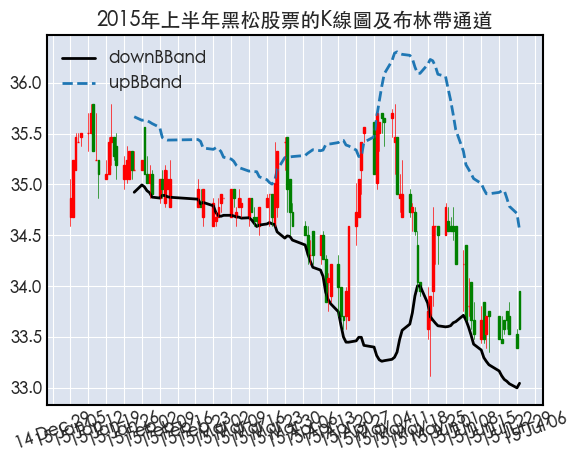

/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

[47.950819672131146,
 21.721311475409838,
 10.655737704918034,
 10.245901639344263,
 2.0491803278688523]

In [23]:

#BBands
def bbands(tsPrice,period=20,times=2):
    upBBand=pd.Series(0.0,index=tsPrice.index)
    midBBand=pd.Series(0.0,index=tsPrice.index)
    downBBand=pd.Series(0.0,index=tsPrice.index)
    sigma=pd.Series(0.0,index=tsPrice.index)
    for i in range(period-1,len(tsPrice)):
        midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
        sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
        upBBand[i]=midBBand[i]+times*sigma[i]
        downBBand[i]=midBBand[i]-times*sigma[i]
    BBands=pd.DataFrame({'upBBand':upBBand[(period-1):],\
                         'midBBand':midBBand[(period-1):],\
                         'downBBand':downBBand[(period-1):],\
                         'sigma':sigma[(period-1):]})
    return(BBands)

HeySongBBands=bbands(Close,20,2)
HeySongBBands.head()
# 繪製2015年布林帶上下通道線
candle.candleLinePlots(candleData=HeySong[:'2015-06-30'],
        candleTitle='2015年上半年黑松股票的K線圖及布林帶通道',
        splitFigures=False,
        Data=HeySongBBands[:'2015-06-30'][['downBBand','upBBand']])

# 布林帶風險
def CalBollRisk(tsPrice,k,multiplier):
    n=len(tsPrice)
    m=len(multiplier)
    tsPrice=tsPrice[k:]
    BollRisk=[]
    for i in range(m):
        BBands=bbands(tsPrice,k,multiplier[i])
        a=0
        b=0
        for j in range(len(BBands)):            
            if tsPrice[j]>BBands.upBBand[j]:
                a+=1
            elif tsPrice[j]<BBands.downBBand[j]:
                b+=1
        BollRisk.append(100*(a+b)/n)
    return(BollRisk)
# 設定標準差倍數向量
# 1.00 : 31.74%
# 1.65 : 10%
# 1.96 : 5%
# 2.00 : 4.56%
# 2.58 : 1%
multiplier=[1,1.65,1.96,2,2.58]
# 2015
price2015=Close['2015']
CalBollRisk(price2015,20,multiplier)
# 2016
CalBollRisk(Close['2016'],20,multiplier)


In [24]:
#strategy 1
# 布林帶上下通道突破策略
BBands=bbands(Close,20,2)

upbreakBB1=upbreak(Close,BBands.upBBand)
downbreakBB1=downbreak(Close,BBands.downBBand)
# 信號出現2天後交易
upBBSig1=-upbreakBB1.shift(2)
downBBSig1=downbreakBB1.shift(2)

tradSignal1=upBBSig1+downBBSig1
tradSignal1[tradSignal1==-0]=0
# 交易評價函數
def perform(tsPrice,tsTradSig):
    ret=tsPrice/tsPrice.shift(1)-1
    tradRet=(ret*tsTradSig).dropna()
    ret=ret[-len(tradRet):]
    winRate=[len(ret[ret>0])/len(ret[ret!=0]),\
             len(tradRet[tradRet>0])/len(tradRet[tradRet!=0])]
    meanWin=[np.mean(ret[ret>0]),\
             np.mean(tradRet[tradRet>0])]
    meanLoss=[np.mean(ret[ret<0]),\
             np.mean(tradRet[tradRet<0])]
    Performance=pd.DataFrame({'winRate':winRate,'meanWin':meanWin,\
                             'meanLoss':meanLoss})
    Performance.index=['Stock','Trade']
    return(Performance)
# 計算平均損失收益率 平均獲勝收益率 交易獲勝率
Performance1= perform(Close,tradSignal1)
Performance1


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3813687864.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

,winRate,meanWin,meanLoss
Stock,0.485577,0.007490,-0.007364
Trade,0.619048,0.007147,-0.008658


In [25]:
# strategy 2
# 另一種布林帶突破策略
# 價格向上穿下通道 做多
# 價格向下穿上通道 做空
upbreakBB2=upbreak(Close,BBands.downBBand)
downbreakBB2=downbreak(Close,BBands.upBBand)
# 較易執行
upBBSig2=upbreakBB2.shift(2)
downBBSig2=-downbreakBB2.shift(2)
tradSignal2=upBBSig2+downBBSig2
tradSignal2[tradSignal2==-0]=0

Performance2= perform(Close,tradSignal2)
Performance2


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2982758038.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2982758038.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  signal[i]=1
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2982758038.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

,winRate,meanWin,meanLoss
Stock,0.485577,0.007490,-0.007364
Trade,0.500000,0.004558,-0.007307


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3803153505.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  RSV.append(100*(Close[j]-periodLow)\
/Users/villager/Moo/lib/candle.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seriesData.loc[:,'Date']=Date
/Users/villager/Moo/lib/candle.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=[seriesData.Da

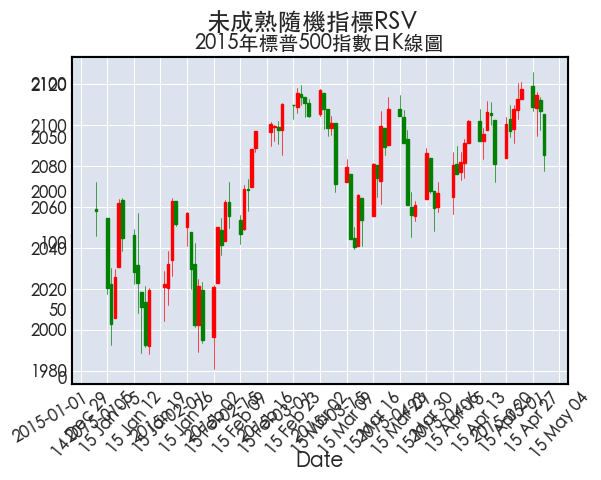

In [26]:
# ch33
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False
# 讀取標普500的交易資料
GSPC=pd.read_csv('GSPC.csv',index_col='Date')
GSPC=GSPC.iloc[:,1:]
GSPC.index=pd.to_datetime(GSPC.index)
GSPC.head()
# 擷取收盤價 最高價 最低價資料
Close=GSPC.Close
High=GSPC.High
Low=GSPC.Low
ndate=len(Close)
# 計算9日RSV值
RSV=[]
for j in range(8,ndate):
    periodHigh=np.max(High[(j-8):(j+1)])
    periodLow=np.min(Low[(j-8):(j+1)])
    RSV.append(100*(Close[j]-periodLow)\
           /(periodHigh-periodLow))
# 查詢RSV前6期取值
RSV=pd.Series(RSV,index=Close.index[8:])
RSV.name='RSV'
RSV.head()
RSV.describe()
# 繪製標普500指數收盤價曲線圖和RSV曲線圖
Close1=Close['2015']
RSV1=RSV['2015']
Cl_RSV=pd.DataFrame([Close1,RSV1]).transpose()
Cl_RSV.plot(subplots=True,
             title='未成熟隨機指標RSV')
# 擷取2015年交易資料
GSPC2015=GSPC['2015':]
# 繪製標普500指數2015年日k線圖
candle.candlePlot(GSPC2015,\
                '2015年標普500指數日K線圖')


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/467082860.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  KValue = (2/3)*K[-1] + (RSV[i]/3)
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/467082860.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


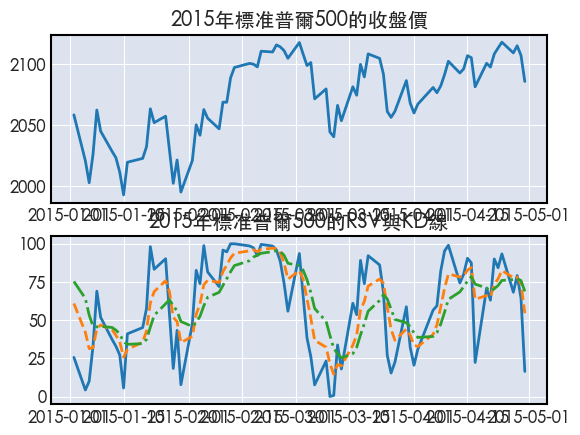

In [27]:
# 計算kd值
K=[50]
D=[50]

for i in range(len(RSV)):
    KValue = (2/3)*K[-1] + (RSV[i]/3)
    DValue = (2/3)*D[-1] + KValue/3
    K.append(KValue)
    D.append(DValue)

K=pd.Series(K[1:],index=RSV.index)
K.name='KValue'
K.head()

D=pd.Series(D[1:],index=RSV.index)
D.name='DValue'
D.head()


plt.subplot(211)
plt.title('2015年標准普爾500的收盤價')
plt.plot(Close['2015'])
plt.subplot(212)
plt.title('2015年標准普爾500的RSV與KD線')
plt.plot(RSV['2015'])
plt.plot(K['2015'],linestyle='dashed')
plt.plot(D['2015'],linestyle='-.')
plt.legend(loc='upper left')


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/3586721964.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


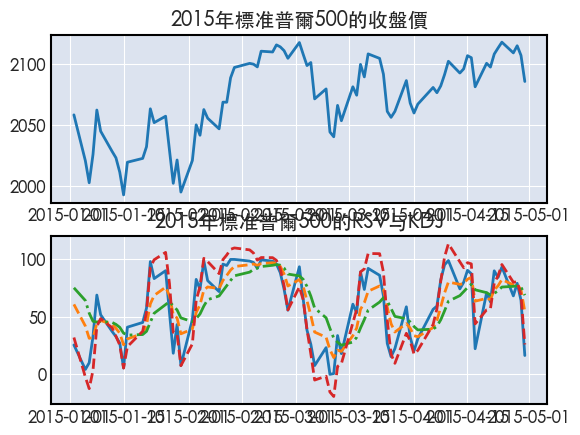

In [28]:
# 計算j值
J=3*K-2*D
J.name='JValue'
J.head()

plt.subplot(211)
plt.title('2015年標准普爾500的收盤價')
plt.plot(Close['2015'])
plt.subplot(212)
plt.title('2015年標准普爾500的RSV与KDJ')
plt.plot(RSV['2015'])
plt.plot(K['2015'],linestyle='dashed')
plt.plot(D['2015'],linestyle='-.')
plt.plot(J['2015'],linestyle='--')
plt.legend(loc='upper left') 


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2770497831.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annRet=(1+x).cumprod()[-1]**(245/len(x))-1


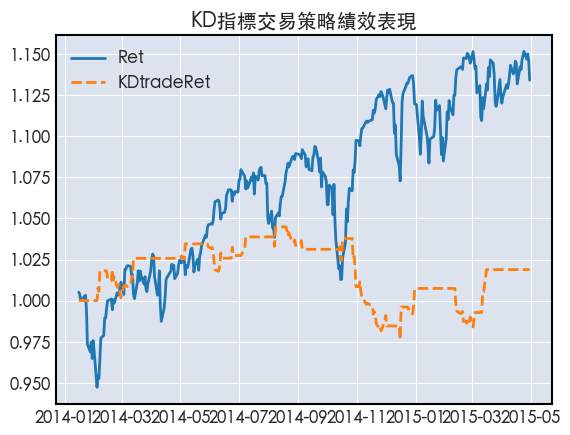

In [29]:
# kd 捕捉超買超賣訊號
# k>85 signal -1
# k<20 signal 1
# d>80 signal -1
# d<20 signal 1
KSignal=K.apply(lambda x:\
                    -1 if x>85 else 1 if x<20 else 0)

DSignal=D.apply(lambda x: \
                 -1 if x>80 else 1 if x<20 else 0)
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'
# kd 任一出現超賣訊號即為1
KDSignal[KDSignal>=1]=1
# kd 任一出現超買訊號即為-1
KDSignal[KDSignal<=-1]=-1
KDSignal.head(n=3)

KDSignal[KDSignal==1].head(n=3)
# 定義交易策略函數
def trade(signal,price):
    ret=(price-price.shift(1))/price.shift(1)
    ret.name='ret'
    signal=signal.shift(1)
    tradeRet=(ret*signal).dropna()
    tradeRet.name='tradeRet'
    tradeRet[tradeRet==-0]=0
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)

KDtrade=trade(KDSignal,Close)
KDtrade.rename(columns={'ret':'Ret',\
              'tradeRet':'KDtradeRet'},\
               inplace=True)
KDtrade.head()

import ffn
# 構造回測函數
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))
# 對kd指標交易進行回測
backtest(KDtrade.Ret,KDtrade.KDtradeRet)

cumRets1=(1+KDtrade).cumprod()
plt.plot(cumRets1.Ret,label='Ret')
plt.plot(cumRets1.KDtradeRet,'--',\
          label='KDtradeRet')
plt.title('KD指標交易策略績效表現')
plt.legend()


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2770497831.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annRet=(1+x).cumprod()[-1]**(245/len(x))-1


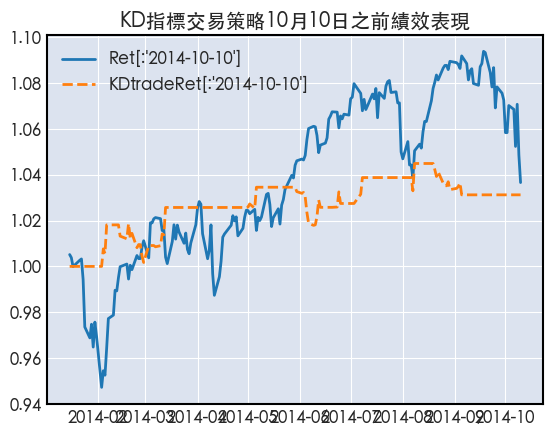

In [30]:
backtest(KDtrade.Ret[:'2014-10-10'],\
          KDtrade.KDtradeRet[:'2014-10-10'])

cumRets2=(1+KDtrade[:'2014-10-10']).cumprod()
plt.plot(cumRets2.Ret,\
          label='''Ret[:'2014-10-10']''')
plt.plot(cumRets2.KDtradeRet,'--',\
          label='''KDtradeRet[:'2014-10-10']''')
plt.title('KD指標交易策略10月10日之前績效表現')
plt.legend(loc='upper left')
#plt.show()


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2770497831.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annRet=(1+x).cumprod()[-1]**(245/len(x))-1


,Ret,KDJtradeRet
win rate,0.566845,0.538462
annualized return,0.048184,0.033101
sharpe ratio,0.031324,0.063364
maximum drawdown,-0.057613,-0.020006


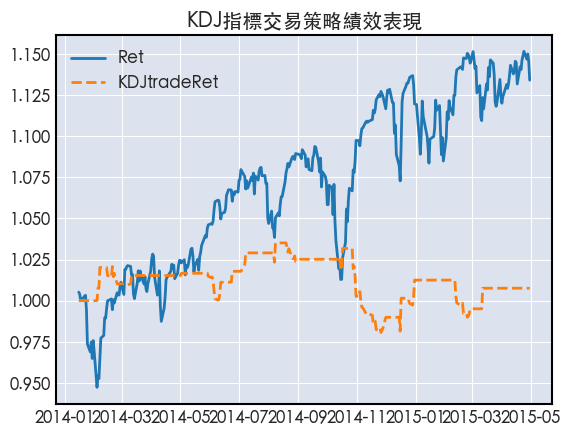

In [31]:
# j值定義超買超賣
# j>100 超買 j<0超賣
JSignal=J.apply(lambda x:\
         -1 if x>100 else 1 if x<0 else 0)


KDJSignal=KSignal+DSignal+JSignal
KDJSignal=KDJSignal.apply(lambda x:\
          1 if x>=2 else -1 if x<=-2 else 0)

KDJtrade=trade(KDJSignal,Close)
KDJtrade.rename(columns={'ret':'Ret',\
             'tradeRet':'KDJtradeRet'},\
             inplace=True)

backtest(KDJtrade.Ret,KDJtrade.KDJtradeRet)

KDJCumRet=(1+KDJtrade).cumprod()
plt.plot(KDJCumRet.Ret,label='Ret')
plt.plot(KDJCumRet.KDJtradeRet,'--',\
          label='KDJtradeRet')
plt.title('KDJ指標交易策略績效表現')
plt.legend(loc='upper left')

backtest(KDJtrade.Ret[:'2014-10-10'],\
             KDJtrade.KDJtradeRet[:'2014-10-10'])


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2770497831.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annRet=(1+x).cumprod()[-1]**(245/len(x))-1


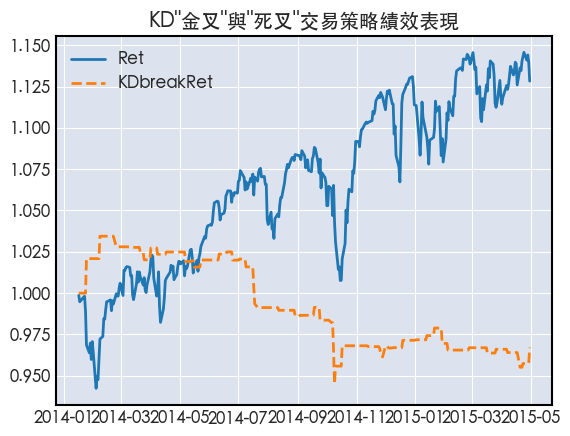

In [32]:
# kd線黃金交叉
# 定義向上突破函數
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,\
                   Line.shift(1)<RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
                     index=Line.index[1:]))
# kd黃金交叉捕捉
KDupbreak=upbreak(K,D)*1
KDupbreak[KDupbreak==1].head()
# kd線死亡交叉
# 定義向下突破函數
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,\
                   Line.shift(1)>RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
           index=Line.index[1:]))
# kd死亡交叉捕捉
KDdownbreak=downbreak(K,D)*1
KDdownbreak[KDdownbreak==1].head()
# 計算收盤價變化量
Close=Close['2014-01-14':]
difClose=Close.diff()
# 價格上漲用1表示 下跌用-1表示
prctrend=2*(difClose[1:]>=0)-1
prctrend.head()
# 制定kd黃金交叉交易訊號 上漲行情 k向上突破d 做多
KDupSig=(KDupbreak[1:]+prctrend)==2
KDupSig.head(n=3)
# 制定kd死亡交叉交易訊號 下跌行情 k向下突破d 做空
KDdownSig= (KDdownbreak[1:]==1)&(prctrend==-1) 
# 綜合黃金交叉 死亡交叉 訊號
breakSig=KDupSig*1+KDdownSig*-1
breakSig.name='breakSig'
breakSig.head()
# kd交叉策略實測
KDbreak=trade(breakSig,Close)
KDbreak.rename(columns={'ret':'Ret',\
              'tradeRet':'KDbreakRet'},\
              inplace=True)
KDbreak.head()

backtest(KDbreak.Ret,KDbreak.KDbreakRet)

KDbreakRet=(1+KDbreak).cumprod()
plt.plot(KDbreakRet.Ret,label='Ret')
plt.plot(KDbreakRet.KDbreakRet,'--',\
          label='KDbreakRet')
plt.title('KD"金叉"與"死叉"交易策略績效表現')
plt.legend(loc='upper left')

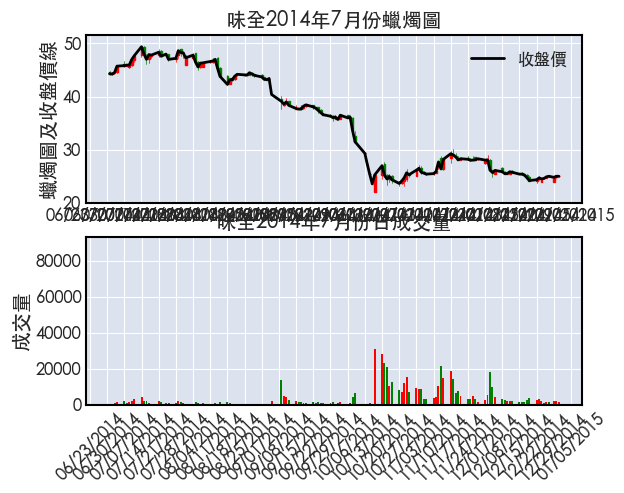

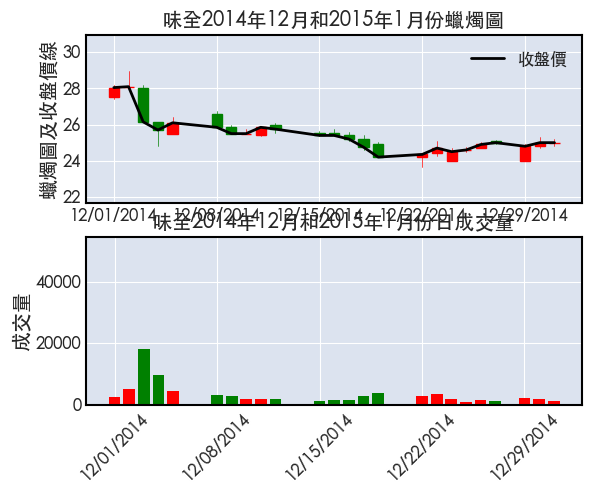

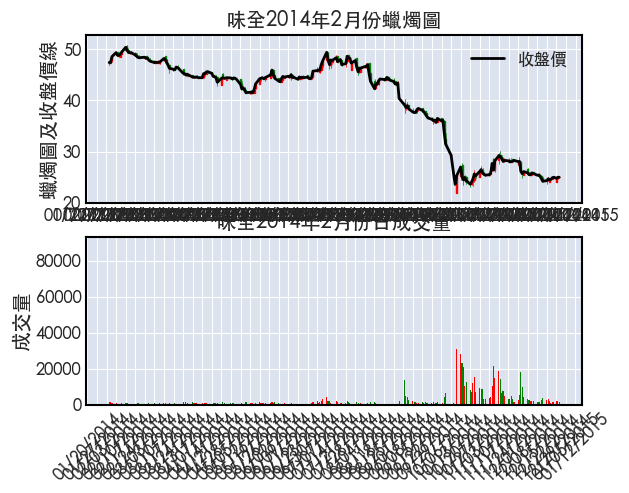

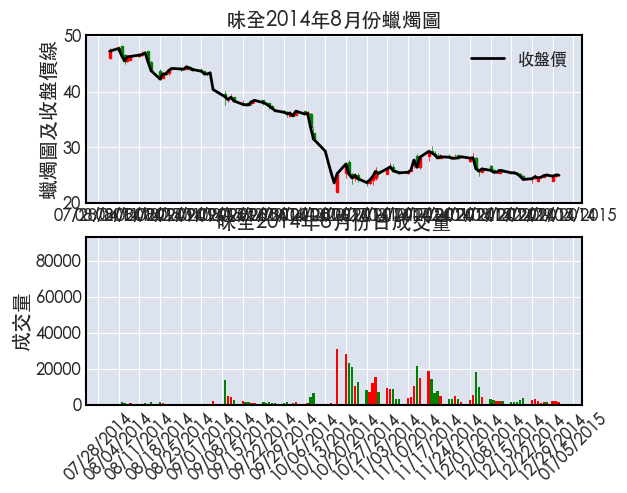

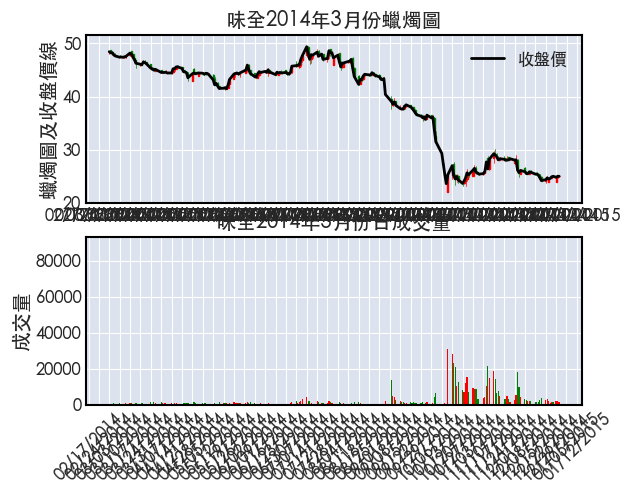

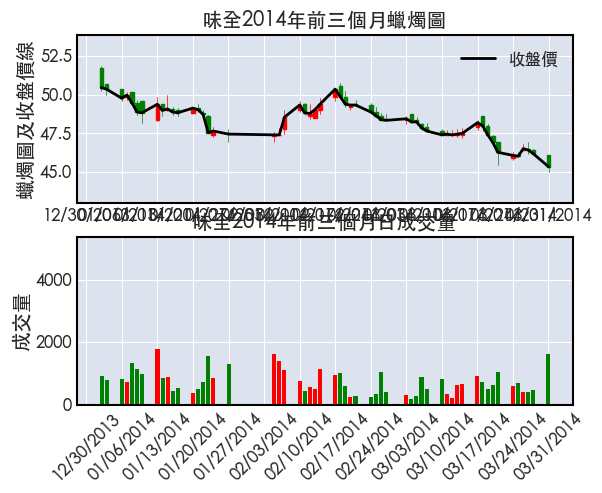

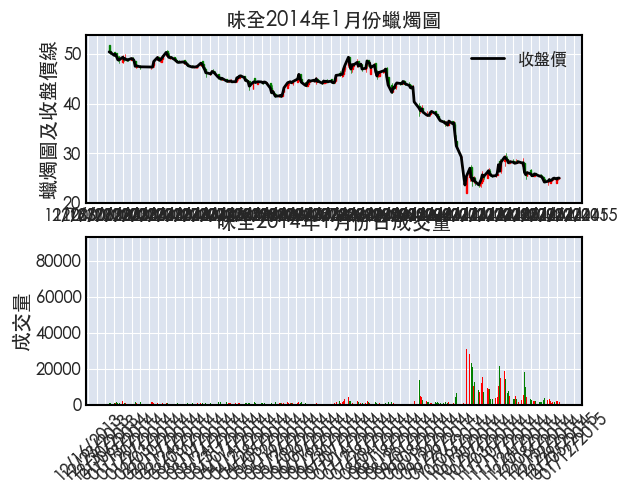

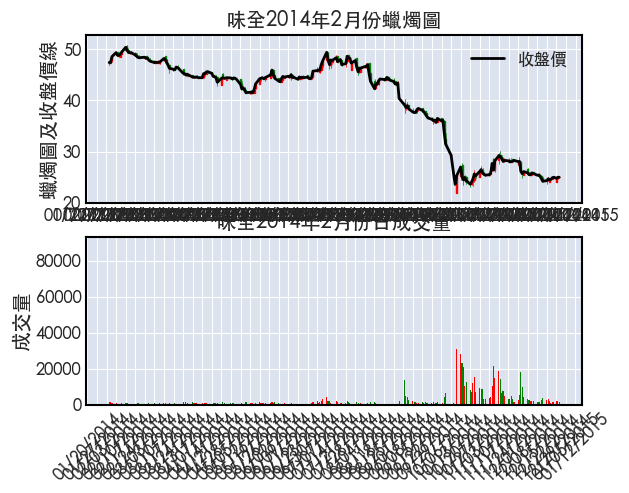

In [33]:
# ch34
import pandas as pd
import numpy as np

# 抓取味全的日度交易資料
WeiChuan=pd.read_csv('1201.csv',sep=',',index_col='Date.1')
WeiChuan.index=pd.to_datetime(WeiChuan.index)
WeiChuan.head()

# debug candle.candleVolume
# seriesData = WeiChuan['2014-07':]
# Date=[date2num(date) for date in seriesData.index]
# print(Date)
# seriesData.loc[:,'Date'] = Date
# print(seriesData)
# print(np.array(Date)[np.array(seriesData.Close>=seriesData.Open)])
# height=seriesData.iloc[:,5][np.array(seriesData.Close>=seriesData.Open)]
# print(height)
 
# price up, volume up 
candle.candleVolume(WeiChuan['2014-07':],
            candletitle='味全2014年7月份蠟燭圖',
             bartitle='味全2014年7月份日成交量')

# up,ping
WeiChuan2=WeiChuan['2014-12':'2015-01']
candle.candleVolume(WeiChuan2,candletitle='味全2014年12月和2015年1月份蠟燭圖',\
            bartitle='味全2014年12月和2015年1月份日成交量')

# up,down
candle.candleVolume(WeiChuan['2014-02':],
            candletitle='味全2014年2月份蠟燭圖',\
            bartitle='味全2014年2月份日成交量')

# ping up   
candle.candleVolume(WeiChuan['2014-08':],
          candletitle='味全2014年8月份蠟燭圖',\
            bartitle='味全2014年8月份日成交量')

# ping down
candle.candleVolume(WeiChuan['2014-03':],
             candletitle='味全2014年3月份蠟燭圖',\
             bartitle='味全2014年3月份日成交量')

# down up 
candle.candleVolume(WeiChuan['2014-01-01':'2014-03-31'],
            candletitle='味全2014年前三個月蠟燭圖',\
            bartitle='味全2014年前三個月日成交量')

# down ping 14-01
candle.candleVolume(WeiChuan['2014-01':],
            candletitle='味全2014年1月份蠟燭圖',\
            bartitle='味全2014年1月份日成交量')

# down down 14-02
candle.candleVolume(WeiChuan['2014-02':],
            candletitle='味全2014年2月份蠟燭圖',\
            bartitle='味全2014年2月份日成交量')

[24. 27. 30. 33. 36. 39. 42. 45. 48. 51. 54. 57. 60.]


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2391709029.py:17: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  UpVol[0]=0
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2391709029.py:20: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  DownVol[0]=0


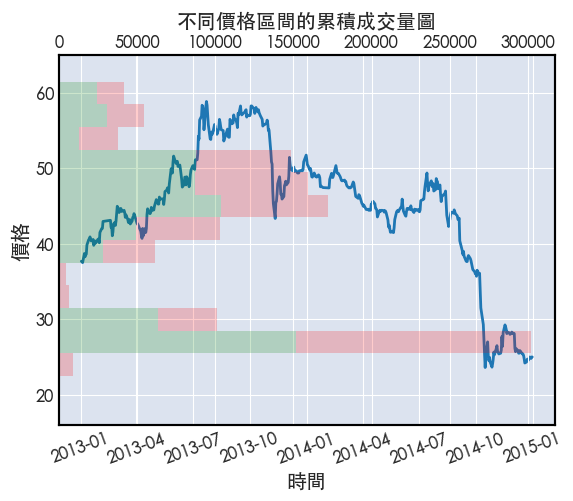

In [34]:
import matplotlib.pyplot as plt
###bar plot
# 抓取收盤價資料
close=WeiChuan.Close
close.describe()
# 調整收盤價資料
BreakClose=np.ceil(close/3)*3
BreakClose.name='BreakClose'
pd.DataFrame({'BreakClose':BreakClose,\
            'Close':close}).head(n=2)
# 抓取成交量資料
volume=WeiChuan.Volume
# 計算價格變化量
PrcChange=close.diff()
# 選取價格增大所對應交易日期的成交量
UpVol=volume.replace(volume[PrcChange<0].array,0)
UpVol[0]=0
# 抓取價格下降所得應教億日期的成交量
DownVol=volume.replace(volume[PrcChange>=0].array,0)
DownVol[0]=0
# 計算價格變化區間中的成交量和
def VOblock(vol,BreakClose=BreakClose):
    return([np.sum(vol[BreakClose==x]) for x in np.unique(BreakClose)])
# 計算價格變化區間中價格上漲日期的成交量和
cumUpVol=VOblock(UpVol)
# 計算價格變化區間中價格下跌日期的成交量和
cumDownVol=VOblock(DownVol)
# 按照行來合併VOP VON
ALLVol=np.array([cumUpVol,cumDownVol]).transpose()
# 繪製價格變化量折線圖並在原圖的基礎上畫新的柱狀圖
fig,ax=plt.subplots()
ax1=ax.twiny()
ax.plot(close)
ax.set_title('不同價格區間的累積成交量圖')
ax.set_ylabel('價格')
ax.set_ylim(16,65)
ax.set_xlabel('時間')
plt.setp(ax.get_xticklabels(),
         rotation=20,horizontalalignment='center')
print(np.unique(BreakClose))
ax1.barh(y=np.unique(BreakClose),width=ALLVol[:,0],\
         height=3,color='g',alpha=0.2)
ax1.barh(y=np.unique(BreakClose),width=ALLVol[:,1],height=3,
        left=ALLVol[:,0],\
        color='r',alpha=0.2)
plt.show()


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1139414101.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  share[i] = share[i-1]
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1139414101.py:49: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  share[i] = share[i-1]
/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/1139414101.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

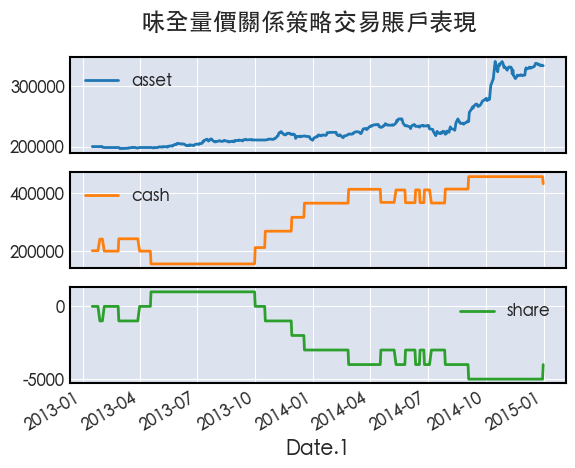

In [35]:
### strategy 
# 抓取成交量資料
volume=WeiChuan.Volume
# 求成交量均值VolSMA
# VolSMA5=pd[volume].rolling_apply(volume,5,np.mean).dropna()
VolSMA5=volume.rolling(5).apply(np.mean)
# VolSMA10=pd.rolling_apply(volume,10,np.mean).dropna()
VolSMA10=volume.rolling(10).apply(np.mean)
VolSMA=((VolSMA5+VolSMA10)/2).dropna()
VolSMA.head(n=3)
# 制定成交量交易訊號
VolSignal=(volume[-len(VolSMA):]>VolSMA)*1
VolSignal[VolSignal==0]=-1
VolSignal.head()
# 計算5日和12日SMA
close=WeiChuan.Close
# PrcSMA5=pd.rolling_apply(close,5,np.mean).dropna()
PrcSMA5=close.rolling(5).apply(np.mean)
# PrcSMA12=pd.rolling_apply(close,12,np.mean).dropna()
PrcSMA12=close.rolling(12).apply(np.mean)

def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,Line.shift(1)<RefLine.shift(1)],axis=0)
    return(pd.Series(signal[1:],index=Line.index[1:]))

def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,Line.shift(1)>RefLine.shift(1)],axis=0)
    return(pd.Series(signal[1:],index=Line.index[1:]))
# 捕捉價格5日均線向下突破12日均線的日期
UpSMA=upbreak(PrcSMA5[-len(PrcSMA12):],PrcSMA12)*1
DownSMA=downbreak(PrcSMA5[-len(PrcSMA12):],PrcSMA12)*(-1)
SMAsignal=UpSMA+DownSMA
# 對成交量訊號與假格均線訊號加總
VolSignal=VolSignal[-len(SMAsignal):]
signal=VolSignal+SMAsignal
signal.describe()
# 當成交量和價格訊號都為1時才買入
# 當成交量和假格訊號都會-1時才賣出
trade=signal.replace([2,-2,1,-1,0],[1,-1,0,0,0])
trade=trade.shift(1).dropna()
trade.head()


def TradeSim(price,signal,initial=200000):
    share=pd.Series(np.zeros(len(signal)),index=price.index)
    cash=initial*np.ones(len(signal))
    for i in range(1,len(signal)):
        cash[i] = cash[i-1]
        share[i] = share[i-1]
        case1 = (share[i]>=5000)&(signal[i] ==-1)
        case2 =(share[i]<=-5000)&(signal[i] ==1)
        case3 = (signal[i]!=0)&(abs(share[i])<5000)
        if any([case1,case2,case3]):
            cash[i] -= signal[i]*price[i]*1000
            share[i] += signal[i]*1000
    asset=cash+price*share
    asset.name='asset'
    account=pd.DataFrame({'asset':asset,'cash':cash,'share':share})
    return(account)

# 繪製帳戶曲線圖
TradeAccount=TradeSim(close[trade.index],trade)
TradeAccount.tail()

TradeAccount.plot(subplots=True,\
        title='味全量價關係策略交易賬戶表現')
plt.show()


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/2729261798.py:13: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  difClose[0]=0
/Users/villager/Moo/lib/movingAverage.py:7: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sma[i]=np.mean(tsPrice[(i-k+1):(i+1)])


<Axes: title={'center': '成交量多空比率淨額'}, xlabel='Date'>

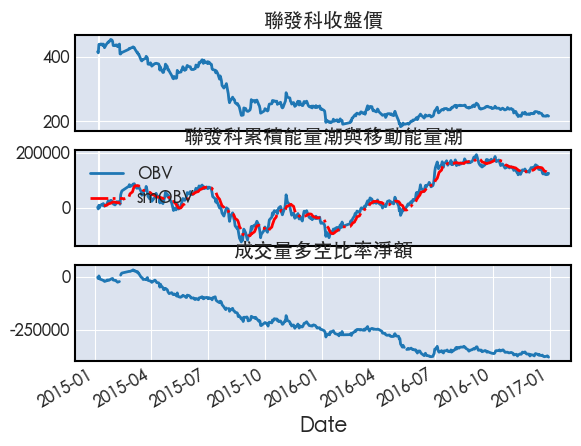

In [36]:
# ch35
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MediaTek = pd.read_csv('2454.csv',sep='\t')
MediaTek.index = pd.to_datetime(MediaTek.Date)

close=MediaTek.Close
Volume=MediaTek.Volume
# 計算OBV
difClose=close.diff()
difClose[0]=0
OBV=(((difClose>=0)*2-1)*Volume).cumsum()
OBV.name='OBV'
OBV.head()
OBV.describe()
# 計算移動型OBV
smOBV=movingAverage.smaCal(OBV,9)
smOBV.tail()
# 計算修正行OBV
AdjOBV=((close-MediaTek.Low)-(MediaTek.High-close)\
         )/(MediaTek.High-MediaTek.Low)*Volume
AdjOBV.name='AdjOBV'
AdjOBV.head()
AdjOBVd=AdjOBV.cumsum()
AdjOBVd.name='AdjOBVd'
AdjOBVd.describe()
# 繪製能量潮線圖
ax1=plt.subplot(3,1,1)
close.plot(title='聯發科收盤價')
plt.xticks(close.index[1:3],(''))
plt.xlabel('')
ax2=plt.subplot(3,1,2)
OBV.plot(label='OBV',title='聯發科累積能量潮與移動能量潮')
smOBV.plot(label='smOBV',linestyle='-.',color='r')
plt.xlabel('')
plt.legend(loc='upper left')
plt.xticks(close.index[1:3],(''))

ax3=plt.subplot(3,1,3)
AdjOBVd.plot(title='成交量多空比率淨額')


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/308719545.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annRet=(1+x).cumprod()[-1]**(245/len(x))-1


,BuyAndHold,OBVTrade
win rate,0.478936,0.490022
annualized return,-0.277702,0.341094
sharpe ratio,-0.044371,0.062447
maximum drawdown,-0.596218,-0.366838


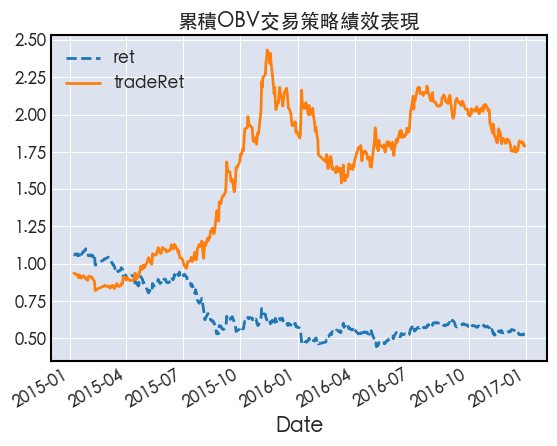

In [37]:
import ffn
# 定義交易策略函數
def trade(obv,price):
    signal=(2*(obv.diff()>0)-1)[1:]
    ret=ffn.to_returns(price)[1:]
    ret.name='ret'
    tradeRet=ret*signal.shift(1)
    tradeRet.name='tradeRet'
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),\
                    left_index=True,right_index=True).dropna()
    return(Returns)
# OBV指標交易策略
OBVtrade=trade(OBV,close)
OBVtrade.head()
# 評價交易策略表現
ret=OBVtrade.ret
tradeRet=OBVtrade.tradeRet
ret.name='BuyAndHold'
tradeRet.name='OBVTrade'
(1+ret).cumprod().plot(label='ret',linestyle='dashed')
(1+tradeRet).cumprod().plot(label='tradeRet')
plt.title('累積OBV交易策略績效表現')
plt.legend()
# 定義交易表現函數
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],index=['win rate',
                        'annualized return',\
                        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    OBVTrade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
    tradeRet.name:OBVTrade}))
# OBV指標交易表現
OBVtest=backtest(ret,tradeRet)
OBVtest


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_99496/308719545.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annRet=(1+x).cumprod()[-1]**(245/len(x))-1


,BuyAndHold,smOBVTrade
win rate,0.478936,0.521064
annualized return,-0.277702,0.148422
sharpe ratio,-0.044371,0.035695
maximum drawdown,-0.596218,-0.353119


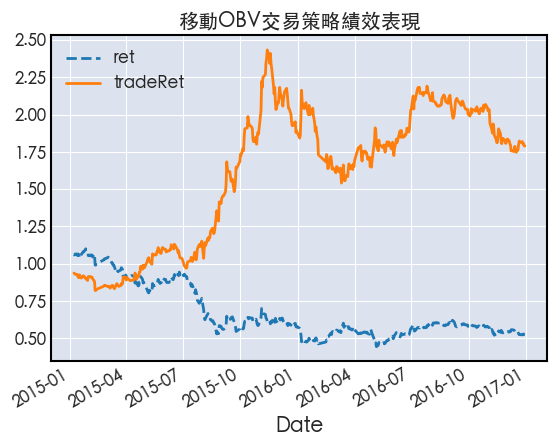

In [38]:
smOBVtrade=trade(smOBV,close)
smOBVtrade.head(n=3)

ret=smOBVtrade.ret
ret.name='BuyAndHold'
smtradeRet=smOBVtrade.tradeRet
smtradeRet.name='smOBVTrade'
(1+ret).cumprod().plot(label='ret',linestyle='dashed')
(1+tradeRet).cumprod().plot(label='tradeRet')
plt.title('移動OBV交易策略績效表現')
plt.legend()

test=backtest(ret,smtradeRet)
test

# Excercise

### 從problem28-1.csv 獲取數據 繪製股價指數2013/03/01 ~2013/05/01 k線和成交量圖

### 從problem28-2.csv 獲取數據 繪製加權股價指數2013上半年的日k線圖 並找出 十字星 型態出現的日期

### 本章介紹如何捕捉早晨之星 用py捕捉股價加權指數2012年日k線圖中 黃昏之星 型態

* 獲取2012/01/01 ~ 2012/12/31 從problem28-3.csv獲取數據
* 定義黃昏之星by py, 連續三日數據進行分析:
  刻畫蠟燭實體:
  第一天收盤價高於開盤價 即描述紅色蠟燭實體 紅色實體要夠大
  第二天收盤價和開盤價大致相等 兩者差別控制在一個範圍內
  第三天綠色蠟燭實體用收盤價低於開盤價來定義 兩者差值要大於等於第一天收盤價與開盤價差值的一半
  定義十字星實體位置:
  第二天收盤價和開盤價均需大於第一天和第三天開盤價
  定義上漲趨勢:
  用收盤價來表示股票的收益率 收益率為正表示上漲
* 用py 自動尋找 黃昏之星 出現日期

### 本章介紹如何捕捉烏雲蓋頂 用py捕捉2011年日k中 看跌吞沒 型態 烏雲蓋頂第二根k線收盤低於第一天k線

* 獲取2011/01/01 ~ 2011/12/31 從problem28-4.csv獲取數據
* 定義看跌吞沒by py, 連續兩天數據分析
  第一個紅色蠟燭實體: 收盤價高於開盤價 收盤價與開盤價差值大於0
  第二個綠色蠟燭實體: 收盤價低於開盤價 收盤價與開盤價的差值小於0
  第二天的開盤價高於第一天的收盤價 第二天收盤價低於第一天的開盤價
  定義上升趨勢: 連續二期的收益率為正
* 用py 自動尋找 看跌吞沒 出現日期

### 本章介紹如何捕捉烏雲蓋頂 用py捕捉2011年日k中 傾盆大雨 型態 由兩根k線組成 第一根k線是一根中陽線或大陽線 表明還持續著上漲趨勢 第二根k線是一根中陰線或大陰線 收盤價要低於前一天的開盤價 收盤價越低 表明見頂訊號越明顯

* 獲取2011/01/01 ~ 2011/12/31 從problem28-5.csv獲取數據
* 定義傾盆大雨by py, 連續兩天數據分析
  第一個紅色蠟燭實體: 收盤價高於開盤價 收盤價與開盤價差值足夠大
  第二個綠色蠟燭實體: 收盤價低於開盤價 收盤價與開盤價的差值小於0
  第二天開盤價低於第一天收盤價 收盤價低於第一天的開盤價
  定義上升趨勢: 連續二期的收益率為正
* 用py 自動尋找 傾盆大雨 出現日期 用k線圖檢驗訊號的真假

### 獲取大同股票2016年日度交易數據 2371.csv

* 請用兩種不同方法分別計算 6日動量值 30日動量值 90日動量值
* 用py 撰寫動量指標策略
  若當期動量值大於0 市場上升趨勢較大 signal 1 第二期(次日)買入股票
  若動量小於0時 市場下跌趨勢較明顯 signal -1 賣出股票 分別用 6日動量值 30日動量值 90日動量值 制定上述交易策略 計算比較三個動量值買賣點預測準確率

### 價格 動量 代表價格變化的動能 動量指標釋放出訊號不一定立即在第二期體現出來 在訊號釋放與確定買賣時間上可能有一定間隔

* 若6日 90日動量值都大於0時 說明市場長短期都具有上升趨勢 釋放買入訊號 signal 1 在買入點上 設定一定的時間間隔 釋放後在第三期才買入股票
* 若6日 90日動量值都小於0時 說明市場長短期都具有下跌趨勢 釋放賣出訊號 signal -1 在賣出點上 設定一定的時間間隔 釋放後在第三期才賣出股票 用py撰寫上述策略 計算該交易策略的準確率

### 動量指標選股與滾動投資策略

* 別別獲取2014年到2016年 彰銀(2801) 京城銀(2809) 旺旺寶(2816) 中壽股票(2823)日度交易數據 運用3個月的收益率來衡量3個月的動量概念 分別計算這四種股票的3個月收益率
* 從2014年開始 在每一期 比較四種股票3個月收益率大小 選出收益率最大的股票 下一期購買100手該股票 進行輪動投資 即每一期持有股票均是前一期3個月動量值最大的股票 到2016年底 計算該投資策略平均收益率大小

### 獲取統一股票 problem29-1.csv 2013/01/01~2014/12/31 日度交易數據

* 繪製統一股票k線圖
* 計算6日 30日 RSI 值 並繪製兩者曲線圖
* 設定6日RSI值大於90為超買區 釋放賣出訊號 6日RSI值小於10為超賣區 釋放買入訊號 計算該訊號預測的準確率
* 當6日RSI上穿30日RSI時 黃金交叉 釋放買入訊號 當6日RSI下穿30RSI時 死亡交叉 釋放賣出訊號 撰寫該策略並進行回測

### RSI將叉不叉 黃金交叉後 短期RSI又可能向下穿破長期RSI 但即將突破前 反而反轉向上走 表明市場向上走勢較強 釋出強烈買入訊號 以上題資料 捕捉該訊號計算預測準確率

### 對道瓊斯指數 DJIA 2011年到2014年數據分析 計算30日 SMA WMA EMA 繪製這三條均線圖

### 獲取台積電股票 2010~2014年交易數據 problem31-2.csv

* 計算14日動量值 繪製收盤價與動量值曲線圖
* 觀察分析上述k線圖 均線 和動量線圖 思考能探索哪些交易策略

### 獲取蘋果公司股票 AAPL 2014年交易數據

* 繪製2014年前兩月k線 在提取前兩月收盤價數據 在蠟燭圖上繪製收盤價曲線圖
* 提取前5月數據 求離差值DIF 訊號線DEA 和MACD值 繪製三者柱狀圖
* 根據本文介紹DIF DEA線的交叉與背離策略 交易實測 並設定asset cash share三種帳戶

### 乖離率 BIAS 是一種衡量股價便離其均值程度的指標

* n日乖離率刻畫了當期股票與收盤價n期簡單移動平均線之間的差距
  nBIAS = (close - SMAn)/SMAn * 100
  撰寫程式計算頻果股價6日乖離率
* 均線乖離率代表了長短期均線的差值情況
  BIASma = (EMAn - SMAm)/SMAm
  n為短週期 7,9,12 m為長週期 38,57,256
  另n = 9, m = 38 計算頻果股價均線乖離率

### 獲取標普500指數 ^GSPC 2014年日度交易數據

* 繪製前兩月k線圖 與收盤價曲線
* 利用布林帶函數在k線圖中添加布林帶線
* 以10天為跨度 運用唐奇安通道策略 繪製標普500上下通道線
* 以10天為跨度 計算簡單移動平均數 為布林帶通道中間線取值 再以前10日收盤價1.5倍標準差 求出布林帶上下通道值 最後繪製三條線
* 比較上述包絡線與布林帶通道線異同

### %b指標 是由布林帶指標衍生 主要刻畫收盤價曲線在布林帶通道中相對位置
    b = (收盤價-布林帶下軌道值)/(布林帶上軌道值-布林帶笑軌道值)
    0-1 布林帶內 0.5 布林帶中線 >1 布林帶上方 <1 布林帶下方

* 沿用上題 計算%b值並繪製線圖
* 結合布林帶線交易策略與%b取值 制定交易策略

### 頻寬指標 是由布林帶指標衍生 主要刻畫布林帶通道寬度的情況
    BW = (布林帶上軌值-布林帶下軌值)/布林帶中軌值

* 沿用數據 計算其頻寬指標
* 總結頻寬取值分佈情況 結合布林帶線和股價線簡要分析市場走勢

### 多空布林線(BBI Boll)與布林帶類似 計算方式為
    中軌道BBI=(SMA3+SMA6+SMA13+SMA24)/4
    上軌道UPR=BBI+M*(BBI n日估算標準差)
    下軌道DWN=BBI-M*(BBI n日估算標準差)
    M = 6, N = 11
    沿用數據 計算BBI上中下軌道 繪製多空布林帶 與布林帶比較分析

### 從GSPC0抓取資料 將KDJ時間跨度9日改為5日 重新計算執行交易策略 與原來的交易策略相比 發生了哪些變化

### 抓取標普500 2013~2014年底 日度交易資料 制定KDJ線交易策略

* 當 K>80 signal 1, k<20 signal -1
* 當 D>80 signal 1, D<20 signal -1
* 當 J>100 signal 1, D<0 signal -1

### 威廉指標為KDJ發展前身
    W&R=(Hn-Cn)/(Hn-Ln)*100%
    n為時間跨度 6,9,14,20,70
    H為最高價 C為收盤價 L為最低價

* 運用上題數據 計算W&R指標 n=14
* W&R >80 超買 <20 超賣 撰寫程式捕捉買賣點

### 抓取味全(1201)2013年股價資料

* 繪製k線圖及成交量圖 尋找量價關係
* 繪製不同價格段位 成交量條形圖
* 繪製成交量加權移動平均價 每日價格*上成交量權重計算出的移動平均
* 把加權移動平均做為布林帶中線 以1.5倍標準差最作為通道上下軌 按照布林帶通道交易策略 對此策略進行交易並回測

### 使用聯發科(2454)交易資料

* 以OBV指標交易策略思路 撰寫修正行OBV指標策略表現
* OBV指標正負也可以釋放交易訊號 當OBV由負值轉正時 市場可能處於上漲趨勢 釋放買入訊號 當OBV由正轉負時 為下跌趨勢 釋放賣出訊號 根據此一策略進行回測與交易評價
